In [27]:
import torch
from torch import optim
from torch.utils.data import Subset, DataLoader

import torchvision
from torchvision import utils
from torchvision import datasets
from torchvision import transforms

from sklearn.model_selection import StratifiedShuffleSplit

import os
import yaml
import collections
import numpy as np
import matplotlib.pyplot as plt

torch.manual_seed(0)
np.random.seed(0)

In [29]:
with open('hyperparameters.yaml') as f:
    hp = yaml.safe_load(f)['hyperparameters']

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor()
])

train_ds = datasets.STL10('./data', split='train', download=True, transform=transform)

train_ds.data.shape

In [4]:
labels = [labels for _, labels in train_ds]
labels_counter = collections.Counter(labels)
labels_counter

Counter({1: 500,
         5: 500,
         6: 500,
         3: 500,
         9: 500,
         7: 500,
         4: 500,
         8: 500,
         0: 500,
         2: 500})

In [5]:
test_ds = datasets.STL10('./data', split='test', download=True, transform=transform)
test_ds.data.shape

Files already downloaded and verified


(8000, 3, 96, 96)

In [6]:
labels_t = [labels for _, labels in test_ds]
labels_t_counter = collections.Counter(labels)
labels_t_counter

Counter({1: 500,
         5: 500,
         6: 500,
         3: 500,
         9: 500,
         7: 500,
         4: 500,
         8: 500,
         0: 500,
         2: 500})

In [7]:
shuffle = StratifiedShuffleSplit(n_splits=1, test_size=.2, random_state=0)
indicies = list(range(len(test_ds)))

# unpack generator
test_i, val_i = shuffle.split(indicies, labels_t).__next__()
print(test_i, test_i.shape)
print(val_i, val_i.shape)

[2096 4321 2767 ... 3206 3910 2902] (6400,)
[6332 6852 1532 ... 5766 4469 1011] (1600,)


In [8]:
val_ds = Subset(test_ds, val_i)
test_ds = Subset(test_ds, test_i)

print(len(val_ds))
print(len(test_ds))

1600
6400


In [9]:
val_labels = [label for _, label in val_ds]
test_labels = [label for _, label in test_ds]

val_counter = collections.Counter(val_labels)
test_counter = collections.Counter(test_labels)

print(val_counter)
print(test_counter)

Counter({2: 160, 8: 160, 3: 160, 6: 160, 4: 160, 1: 160, 5: 160, 9: 160, 0: 160, 7: 160})
Counter({6: 640, 0: 640, 4: 640, 5: 640, 9: 640, 2: 640, 3: 640, 1: 640, 7: 640, 8: 640})


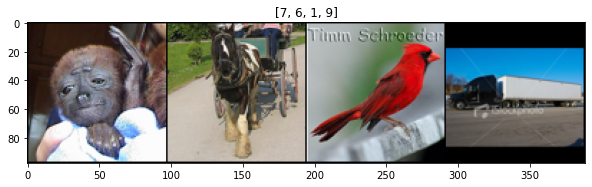

In [11]:
def show(img, label=None):
    img = img.numpy()
    img = img.transpose(1, 2, 0)
    plt.imshow(img)
    if label is not None:
        plt.title(label)

img_idx = np.random.randint(0, len(train_ds), 4)

img_X = [train_ds[i][0] for i in img_idx]
img_y = [train_ds[i][1] for i in img_idx]
grid = utils.make_grid(img_X, nrow=4, padding=1)

plt.figure(figsize=(10, 10))
show(grid, img_y)

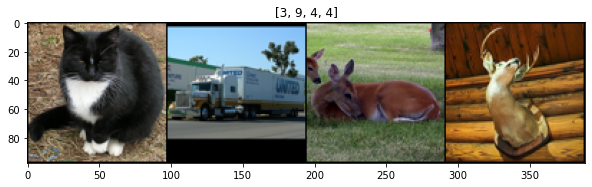

In [14]:
img_idx_v = np.random.randint(0, len(val_ds), 4)

img_X_v = [val_ds[i][0] for i in img_idx_v]
img_y_v = [val_ds[i][1] for i in img_idx_v]
grid_v = utils.make_grid(img_X_v, nrow=4, padding=1)

plt.figure(figsize=(10, 10))
show(grid_v, img_y_v)

In [17]:
# mean and standard deviation
mean_rgb = [np.mean(img.numpy(), axis=(1, 2)) for img, _ in train_ds]
std_rgb = [np.std(img.numpy(), axis=(1, 2)) for img, _ in train_ds]

mean_r, mean_g, mean_b = [np.mean([m[i] for m in mean_rgb]) for i in range(3)]
std_r, std_g, std_b = [np.mean([s[i] for s in std_rgb]) for i in range(3)]

In [20]:
print(f'Mean - R: {mean_r:.4f} G: {mean_g:.4f} B: {mean_b:.4f}')
print(f'StdDev - R: {std_r:.4f} G: {std_g:.4f} B: {std_b:.4f}')

Mean - R: 0.4467 G: 0.4398 B: 0.4066
StdDev - R: 0.2241 G: 0.2215 B: 0.2239


In [22]:
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5)
    , transforms.RandomVerticalFlip(p=0.5)
    , transforms.ToTensor()
    , transforms.Normalize(mean=[mean_r, mean_g, mean_b], std=[std_r, std_g, std_b])
])

test_transform = transforms.Compose([
    transforms.ToTensor()
])

In [23]:
train_ds.transform = train_transform
test_ds.transform = test_transform

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


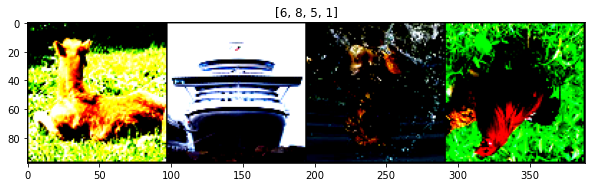

In [24]:
img_idx_n = np.random.randint(0, len(train_ds), 4)

img_X_n = [train_ds[i][0] for i in img_idx_n]
img_y_n = [train_ds[i][1] for i in img_idx_n]
grid_n = utils.make_grid(img_X_n, nrow=4, padding=1)

plt.figure(figsize=(10, 10))
show(grid_n, img_y_n)

In [30]:
batch_size = hp['batch_size']

train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=batch_size, shuffle=False)

for data, _ in train_dl:
    print(data.shape) # batch size, channels, height, width
    break

torch.Size([64, 3, 96, 96])
